In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

In [3]:
las = lasio.read('1052127338.las')
df = las.df()
df.tail()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,...,RLL3,RXORT,SP,ABHV,MN,MI,MCAL,DT,ITT,SPOR
DEPT,,,,,,,,,,,,,,,,,,,,,
4753.0,0.0,0.0,16.9897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,-94.5769,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4753.5,0.0,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,-95.2326,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4754.0,0.0,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,-95.6581,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4754.5,0.0,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,-95.9097,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4755.0,0.0,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,-96.0656,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)
df.head()

,DEPT,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,RLL3,RXORT,SP,ABHV,MN,MI,MCAL,DT,ITT,SPOR
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,0.4928,430.6558,38.0480,1124.178,0.1694,4.0168,1.4854,62.6824,0.0,10.6665
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,0.4937,432.0208,38.0689,1124.178,0.1705,4.0168,1.4860,60.2160,0.0,8.9222
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,0.4934,432.7022,38.0724,1124.178,0.1711,4.0168,1.4881,58.2024,0.0,7.4981
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,0.4914,432.7892,38.0626,1124.178,0.1714,4.0168,1.4893,57.0723,0.0,6.6989
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,0.4895,432.6860,38.0413,1124.178,0.1722,4.0168,1.4886,56.7880,0.0,6.4979


In [5]:
df.rename(columns={'DEPT':'DEPTH'}, inplace=True)
df.head()

,DEPTH,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,RLL3,RXORT,SP,ABHV,MN,MI,MCAL,DT,ITT,SPOR
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,0.4928,430.6558,38.0480,1124.178,0.1694,4.0168,1.4854,62.6824,0.0,10.6665
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,0.4937,432.0208,38.0689,1124.178,0.1705,4.0168,1.4860,60.2160,0.0,8.9222
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,0.4934,432.7022,38.0724,1124.178,0.1711,4.0168,1.4881,58.2024,0.0,7.4981
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,0.4914,432.7892,38.0626,1124.178,0.1714,4.0168,1.4893,57.0723,0.0,6.6989
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,0.4895,432.6860,38.0413,1124.178,0.1722,4.0168,1.4886,56.7880,0.0,6.4979


In [6]:
# quick step to see one log at a time
#df.plot('GR', 'DEPTH')

In [7]:
# plot all the logs that are in the .las file
#df.plot(subplots=True, figsize=(15,15));

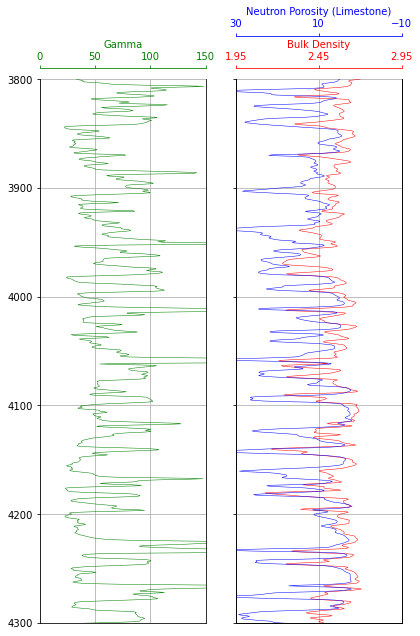

In [8]:
# plot Gamma, density and porosity

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Bulk Density', 'Neutron Porosity (Limestone)', 'Lithology']
label_color = ['g', 'r', 'b', 'k']

#set up the plot axis
ax1 = plt.subplot2grid((1,3),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,3),(0,1), rowspan=1, colspan=1)
ax3 = ax2.twiny()

# gamma ray
ax1.plot('GR', 'DEPTH', data=df, color='green', lw=0.5) #call the data from the df
ax1.set_xlim(0, 150) #change the limits for the curve being plotted
ax1.tick_params(axis='x', colors="green")
ax1.set_xticks([0, 50, 100, 150])

# density
ax2.plot('RHOB', 'DEPTH', data=df, color='red', lw=0.5) 
ax2.set_xlim(1.95, 2.95) 
ax2.tick_params(axis='x', colors="red")
ax2.set_xticks([1.95, 2.45, 2.95])

# neutron porosity
ax3.plot('CNLS', 'DEPTH', data=df, color='blue', lw=0.5) 
ax3.set_xlim(30, -10) 
ax3.tick_params(axis='x', colors="blue")
ax3.set_xticks([30, 10, -10])

# set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4300, 3800) #depth intervals
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    ax.xaxis.label.set_color(label_color[i])
   
    if i == 2:
        ax.spines['top'].set_position(('axes', 1.08))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])
    else:
        ax.grid()
        ax.spines["top"].set_position(("axes", 1.02))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])   
        
# hide tick labels on the y-axis
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# reduce space between each subplot
fig.subplots_adjust(wspace = 0.18)

In [9]:
# Define a dictionary containing Students data
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [10]:
# Convert the dictionary into DataFrame
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,lith_num,hatch,color
LITHOLOGY,,,,
30000,Sandstone,1,..,#ffff00
65030,Sandstone/Shale,2,-.,#ffe119
65000,Shale,3,--,#bebebe
80000,Marl,4,,#7cfc00
74000,Dolomite,5,-/,#8080ff
70000,Limestone,6,+,#80ffff
70032,Chalk,7,..,#80ffff
88000,Halite,8,x,#7ddfbe
86000,Anhydrite,9,,#ff80ff


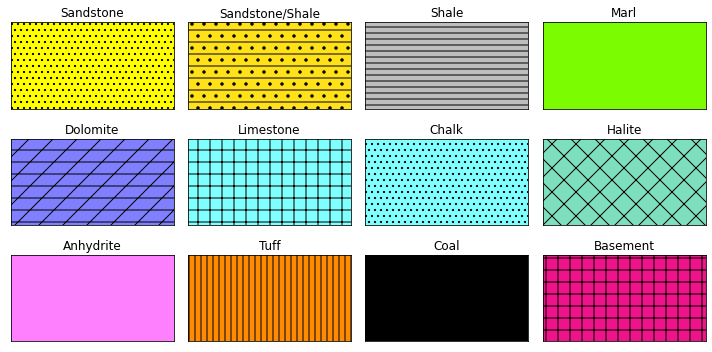

In [11]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()
plt.show()

In [46]:
# create a list of our conditions
conditions = [(df['GR'] >= 0) & (df['GR'] <= 75) & (df['RHOB'] >= 2.55) & (df['RHOB'] <= 2.95),
              (df['GR'] >= 0) & (df['GR'] <= 75) & (df['RHOB'] >= 2.35) & (df['RHOB'] <= 2.55),
              (df['GR'] >= 0) & (df['GR'] <= 75) & (df['RHOB'] >= 1.95) & (df['RHOB'] <= 2.35),
              (df['GR'] > 75) & (df['GR'] <= 90) & (df['RHOB'] >= 2.55) & (df['RHOB'] <= 2.95),
              (df['GR'] > 75) & (df['GR'] <= 90) & (df['RHOB'] >= 2.35) & (df['RHOB'] <= 2.55),
              (df['GR'] > 75) & (df['GR'] <= 90) & (df['RHOB'] >= 1.95) & (df['RHOB'] <= 2.35),
              (df['GR'] > 90) & (df['GR'] <= 1000) & (df['RHOB'] >= 2.55) & (df['RHOB'] <= 2.95),
              (df['GR'] > 90) & (df['GR'] <= 1000) & (df['RHOB'] >= 2.35) & (df['RHOB'] <= 2.55),
              (df['GR'] > 90) & (df['GR'] <= 1000) & (df['RHOB'] >= 1.95) & (df['RHOB'] <= 2.35)]

# create a list of the values we want to assign for each condition
values = [30000, 65030, 65030, 30000, 65030, 65000, 65000, 65000, 65000]

# create a new column and use np.select to assign values to it using our lists as arguments
df['LITHOLOGY'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,DEPTH,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,MI,MCAL,DT,ITT,SPOR,LITHOLOGY,Clay Vol,DENSITYPOROSITY,PHIA,PHIEF
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,4.0168,1.4854,62.6824,0.0,10.6665,65030,0.159137,24.217949,31.645324,26.609394
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,4.0168,1.4860,60.2160,0.0,8.9222,65030,0.158791,24.589744,31.495222,26.494061
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,4.0168,1.4881,58.2024,0.0,7.4981,65030,0.150840,24.730769,31.089285,26.399789
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,4.0168,1.4893,57.0723,0.0,6.6989,65030,0.145234,24.679487,30.710544,26.250331
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,4.0168,1.4886,56.7880,0.0,6.4979,65030,0.143382,24.641026,30.609463,26.220612


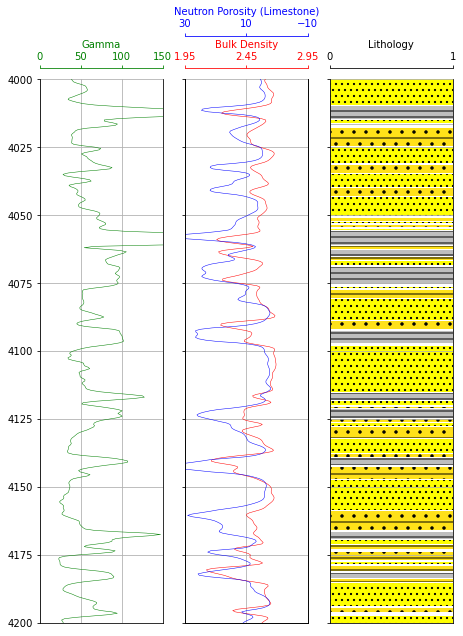

In [13]:
# add lithology plot

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Bulk Density', 'Neutron Porosity (Limestone)', 'Lithology']
label_color = ['g', 'r', 'b', 'k']

#set up the plot axis
ax1 = plt.subplot2grid((1,4),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,4),(0,1), rowspan=1, colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,4),(0,2), rowspan=1, colspan=1)

# gamma ray
ax1.plot('GR', 'DEPTH', data=df, color='green', lw=0.5) #call the data from the df
ax1.set_xlim(0, 150) #change the limits for the curve being plotted
ax1.tick_params(axis='x', colors="green")
ax1.set_xticks([0, 50, 100, 150])

# density
ax2.plot('RHOB', 'DEPTH', data=df, color='red', lw=0.5) 
ax2.set_xlim(1.95, 2.95) 
ax2.tick_params(axis='x', colors="red")
ax2.set_xticks([1.95, 2.45, 2.95])

# neutron porosity
ax3.plot('CNLS', 'DEPTH', data=df, color='blue', lw=0.5) 
ax3.set_xlim(30, -10) 
ax3.tick_params(axis='x', colors="blue")
ax3.set_xticks([30, 10, -10])

ax4.plot('LITHOLOGY', 'DEPTH', data=df, color='black', lw=0.5) 
ax4.set_xlim(0, 1) 
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax4.fill_betweenx(df['DEPTH'], 0, df['LITHOLOGY'], where=(df['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)
    ax4.set_xticks([0, 1])

# set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4200, 4000) #depth intervals
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    ax.xaxis.label.set_color(label_color[i])
   
    if i == 2:
        ax.spines['top'].set_position(('axes', 1.08))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])
    else:
        ax.grid()
        ax.spines["top"].set_position(("axes", 1.02))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])   
        
# hide tick labels on the y-axis
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# reduce space between each subplot
fig.subplots_adjust(wspace = 0.18)

In [45]:
# compute clay volume

# Clay vol = (GR(i) - GRmin)/ (GRmax - GRmin)

df['Clay Vol'] = (df['GR'] - np.min(df['GR'])) / (np.max(df['GR'])-np.min(df['GR']))
df.head()

,DEPTH,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,MI,MCAL,DT,ITT,SPOR,LITHOLOGY,Clay Vol,DENSITYPOROSITY,PHIA,PHIEF
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,4.0168,1.4854,62.6824,0.0,10.6665,65030,0.159137,24.217949,31.645324,26.609394
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,4.0168,1.4860,60.2160,0.0,8.9222,65030,0.158791,24.589744,31.495222,26.494061
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,4.0168,1.4881,58.2024,0.0,7.4981,65030,0.150840,24.730769,31.089285,26.399789
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,4.0168,1.4893,57.0723,0.0,6.6989,65030,0.145234,24.679487,30.710544,26.250331
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,4.0168,1.4886,56.7880,0.0,6.4979,65030,0.143382,24.641026,30.609463,26.220612


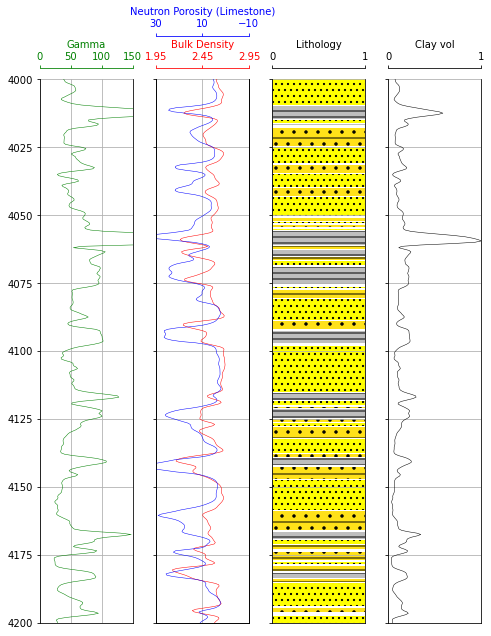

In [15]:
# add clay vol plot

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Bulk Density', 'Neutron Porosity (Limestone)', 'Lithology', 'Clay vol']
label_color = ['g', 'r', 'b', 'k', 'k']

#set up the plot axis
ax1 = plt.subplot2grid((1,5),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1), rowspan=1, colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1,5),(0,3), rowspan=1, colspan=1)

# gamma ray
ax1.plot('GR', 'DEPTH', data=df, color='green', lw=0.5) #call the data from the df
ax1.set_xlim(0, 150) #change the limits for the curve being plotted
ax1.tick_params(axis='x', colors="green")
ax1.set_xticks([0, 50, 100, 150])

# density
ax2.plot('RHOB', 'DEPTH', data=df, color='red', lw=0.5) 
ax2.set_xlim(1.95, 2.95) 
ax2.tick_params(axis='x', colors="red")
ax2.set_xticks([1.95, 2.45, 2.95])

# neutron porosity
ax3.plot('CNLS', 'DEPTH', data=df, color='blue', lw=0.5) 
ax3.set_xlim(30, -10) 
ax3.tick_params(axis='x', colors="blue")
ax3.set_xticks([30, 10, -10])

ax4.plot('LITHOLOGY', 'DEPTH', data=df, color='black', lw=0.5) 
ax4.set_xlim(0, 1) 
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax4.fill_betweenx(df['DEPTH'], 0, df['LITHOLOGY'], where=(df['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)
    ax4.set_xticks([0, 1])
    
# clay vol
ax5.plot('Clay Vol', 'DEPTH', data=df, color='k', lw=0.5) 
ax5.set_xlim(0, 1) 
ax5.tick_params(axis='x', colors="k")
ax5.set_xticks([0, 1])

# set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4200, 4000) #depth intervals
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    ax.xaxis.label.set_color(label_color[i])
   
    if i == 2:
        ax.spines['top'].set_position(('axes', 1.08))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])
    else:
        ax.grid()
        ax.spines["top"].set_position(("axes", 1.02))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])   
        
# hide tick labels on the y-axis
for ax in [ax2, ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# reduce space between each subplot
fig.subplots_adjust(wspace = 0.25)

In [43]:
# compute density porosity

# Density porosity = (RHO(matrix) - RHO(bulk density)) / (RHO(matrix)-(RHO(fluid)))

df['DENSITYPOROSITY'] = ((2.71 - df['RHOB']) / (2.71 - 1.15))*100
df.head()

,DEPTH,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,MI,MCAL,DT,ITT,SPOR,LITHOLOGY,Clay Vol,DENSITYPOROSITY,PHIA,PHIEF
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,4.0168,1.4854,62.6824,0.0,10.6665,65030,0.159137,24.217949,31.645324,26.609394
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,4.0168,1.4860,60.2160,0.0,8.9222,65030,0.158791,24.589744,31.495222,26.494061
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,4.0168,1.4881,58.2024,0.0,7.4981,65030,0.150840,24.730769,31.089285,26.399789
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,4.0168,1.4893,57.0723,0.0,6.6989,65030,0.145234,24.679487,30.710544,26.250331
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,4.0168,1.4886,56.7880,0.0,6.4979,65030,0.143382,24.641026,30.609463,26.220612


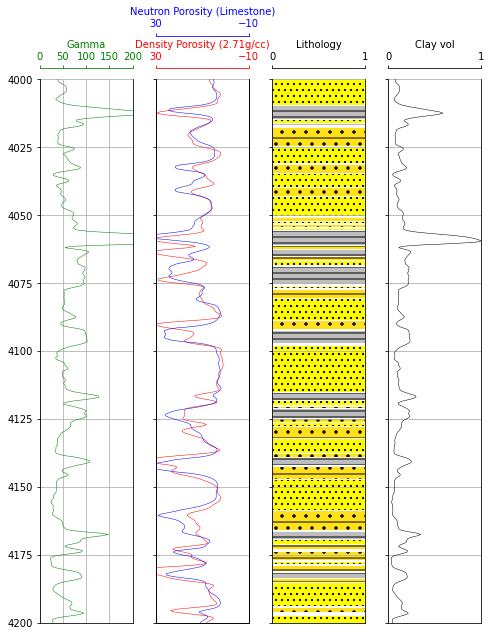

In [18]:
# add density porosity plot

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Density Porosity (2.71g/cc)', 'Neutron Porosity (Limestone)', 
               'Lithology', 'Clay vol']
label_color = ['g', 'r', 'b', 'k', 'k']

#set up the plot axis
ax1 = plt.subplot2grid((1,5),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1), rowspan=1, colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1,5),(0,3), rowspan=1, colspan=1)

# gamma ray
ax1.plot('GR', 'DEPTH', data=df, color='green', lw=0.5) #call the data from the df
ax1.set_xlim(0, 150) #change the limits for the curve being plotted
ax1.tick_params(axis='x', colors="green")
ax1.set_xticks([0, 50, 100, 150, 200])

# density
ax2.plot('DENSITYPOROSITY', 'DEPTH', data=df, color='red', lw=0.5) 
ax2.set_xlim(30, -10) 
ax2.tick_params(axis='x', colors="red")
ax2.set_xticks([30, -10])

# neutron porosity
ax3.plot('CNLS', 'DEPTH', data=df, color='blue', lw=0.5) 
ax3.set_xlim(30, -10) 
ax3.tick_params(axis='x', colors="blue")
ax3.set_xticks([30, -10])

ax4.plot('LITHOLOGY', 'DEPTH', data=df, color='black', lw=0.5) 
ax4.set_xlim(0, 1) 
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax4.fill_betweenx(df['DEPTH'], 0, df['LITHOLOGY'], where=(df['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)
    ax4.set_xticks([0, 1])
    
# clay vol
ax5.plot('Clay Vol', 'DEPTH', data=df, color='k', lw=0.5) 
ax5.set_xlim(0, 1) 
ax5.tick_params(axis='x', colors="k")
ax5.set_xticks([0, 1])

# set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4200, 4000) #depth intervals
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    ax.xaxis.label.set_color(label_color[i])
   
    if i == 2:
        ax.spines['top'].set_position(('axes', 1.08))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])
    else:
        ax.grid()
        ax.spines["top"].set_position(("axes", 1.02))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])   
        
# hide tick labels on the y-axis
for ax in [ax2, ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# reduce space between each subplot
fig.subplots_adjust(wspace = 0.25)

In [44]:
# Compute avg porosity and eff. porosity

# average porosity: PHIA= (DPHI+ NPHI)/2 = (DENSITYPOROSITY+CNLS)/2

df['PHIA'] = (df['DENSITYPOROSITY'] + df['CNLS']) / 2
df

# eff. porosity: PHIE= total porosity (PHIT) – (PHICLAY * CLAY VOL)

df['PHIEF'] = df['PHIA'] - df['PHIA'] * df['Clay Vol']
df.head()

,DEPTH,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,MI,MCAL,DT,ITT,SPOR,LITHOLOGY,Clay Vol,DENSITYPOROSITY,PHIA,PHIEF
0,345.0,0.0,0.0,11.6474,33.8703,39.0727,39.0727,40.4102,1.4854,22.0935,...,4.0168,1.4854,62.6824,0.0,10.6665,65030,0.159137,24.217949,31.645324,26.609394
1,345.5,0.0,0.0,11.2510,32.7782,38.4007,38.4007,39.9809,1.4860,22.4353,...,4.0168,1.4860,60.2160,0.0,8.9222,65030,0.158791,24.589744,31.495222,26.494061
2,346.0,0.0,0.0,11.0685,31.5373,37.4478,37.4478,39.3533,1.4881,22.5623,...,4.0168,1.4881,58.2024,0.0,7.4981,65030,0.150840,24.730769,31.089285,26.399789
3,346.5,0.0,0.0,11.0652,30.6446,36.7416,36.7416,38.8625,1.4893,22.5170,...,4.0168,1.4893,57.0723,0.0,6.6989,65030,0.145234,24.679487,30.710544,26.250331
4,347.0,0.0,0.0,11.1184,30.4028,36.5779,36.5779,38.7446,1.4886,22.4794,...,4.0168,1.4886,56.7880,0.0,6.4979,65030,0.143382,24.641026,30.609463,26.220612


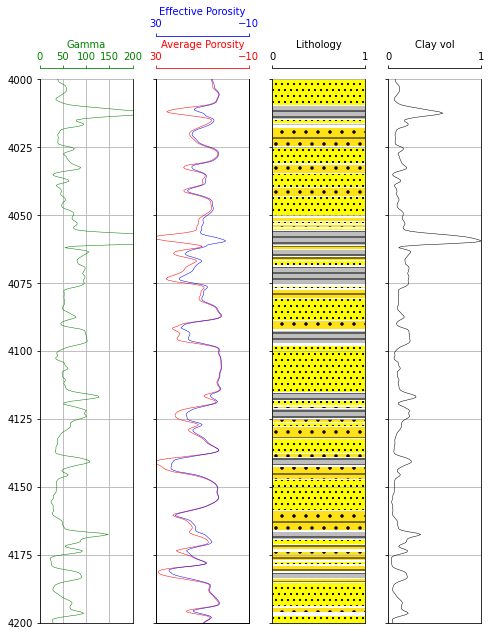

In [42]:
# add average and effective porosity plots

fig, axes = plt.subplots(figsize=(10,10))
curve_names = ['Gamma', 'Average Porosity', 'Effective Porosity', 
               'Lithology', 'Clay vol']
label_color = ['g', 'r', 'b', 'k', 'k']

#set up the plot axis
ax1 = plt.subplot2grid((1,5),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1), rowspan=1, colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1,5),(0,3), rowspan=1, colspan=1)

# gamma ray
ax1.plot('GR', 'DEPTH', data=df, color='green', lw=0.5) #call the data from the df
ax1.set_xlim(0, 150) #change the limits for the curve being plotted
ax1.tick_params(axis='x', colors="green")
ax1.set_xticks([0, 50, 100, 150, 200])

# density
ax2.plot('PHIA', 'DEPTH', data=df, color='red', lw=0.5) 
ax2.set_xlim(30, -10) 
ax2.tick_params(axis='x', colors="red")
ax2.set_xticks([30, -10])

# neutron porosity
ax3.plot('PHIEF', 'DEPTH', data=df, color='blue', lw=0.5) 
ax3.set_xlim(30, -10) 
ax3.tick_params(axis='x', colors="blue")
ax3.set_xticks([30, -10])

ax4.plot('LITHOLOGY', 'DEPTH', data=df, color='black', lw=0.5) 
ax4.set_xlim(0, 1) 
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax4.fill_betweenx(df['DEPTH'], 0, df['LITHOLOGY'], where=(df['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)
    ax4.set_xticks([0, 1])
    
# clay vol
ax5.plot('Clay Vol', 'DEPTH', data=df, color='k', lw=0.5) 
ax5.set_xlim(0, 1) 
ax5.tick_params(axis='x', colors="k")
ax5.set_xticks([0, 1])

# set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4200, 4000) #depth intervals
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(curve_names[i])
    ax.xaxis.label.set_color(label_color[i])
   
    if i == 2:
        ax.spines['top'].set_position(('axes', 1.08))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])
    else:
        ax.grid()
        ax.spines["top"].set_position(("axes", 1.02))
        ax.spines["top"].set_visible(True)
        ax.spines["top"].set_edgecolor(label_color[i])   
        
# hide tick labels on the y-axis
for ax in [ax2, ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
# reduce space between each subplot
fig.subplots_adjust(wspace = 0.25)